# Bidirectional lstm model


In [ ]:
import pandas as pd 
import numpy as np 
import nltk
nltk.download('punkt')
nltk.download('wordnet')


from nltk.stem import WordNetLemmatizer

#Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
#from textblob import TextBlob



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#!pip install plotly
#from plotly import tools
#import plotly.graph_objs as go
#from plotly.offline import iplot
#%matplotlib inline

In [ ]:
!pip install nltk

In [ ]:
!pip install --upgrade nbformat

Requirement already up-to-date: nbformat in /usr/local/lib/python3.7/dist-packages (5.1.3)


In [ ]:
!pip install spacy

In [ ]:
!pip install WordCloud

In [ ]:
!pip install gensim

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import nltk
import re
import string
#from nltk.stem import PorterStemmer, WordNetLemmatizerLemmatizer
from nltk.corpus import stopwords

from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize,sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


In [ ]:
import sklearn 
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import MultinomialNB 
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import validation_curve
#from sklearn.model_selection import KFold

In [ ]:
#Deep learning libraries
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense,Conv1D,MaxPool1D,Flatten,Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model

In [ ]:
df_fake_news = pd.read_csv('/content/drive/MyDrive/fake news/Fake.csv' )
df_true_news = pd.read_csv('/content/drive/MyDrive/fake news/True.csv')

In [ ]:
df_true_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
df_fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
df_true_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_fake_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
df_true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
(df_fake_news.shape)

(23481, 4)

In [ ]:
(df_true_news.shape)

(21417, 4)

In [ ]:
df_fake_news['label']=0
df_true_news['label']=1

#df_fake_news.head()
df_true_news.head()


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df = pd.concat([df_true_news,df_fake_news]).reset_index(drop=True)
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
df=df.sample(frac=1).reset_index(drop=True)
df.head(10)

,title,text,subject,date,label
0,India bars 'unruly' passengers from flying for...,NEW DELHI (Reuters) - India has issued new nor...,worldnews,"September 8, 2017",1
1,JILL STEIN Claims Recount Is About Possible Fo...,Watch Stein tell CNN host she is concerned abo...,politics,"Dec 4, 2016",0
2,SMUG CNN ANCHORS Say They Won’t Release Identi...,The hosts of New Day dug a deeper hole for C...,left-news,"Jul 5, 2017",0
3,UPDATE: UNDER PRESSURE? MISS USA Just Flip Flo...,The glowing review we gave to Miss USA Kara Mc...,politics,"May 16, 2017",0
4,Puerto Rico power grid faces generational thre...,(Reuters) - Hurricane Maria was on course Tues...,worldnews,"September 19, 2017",1
5,Mexico's Senate picks new electoral prosecutor...,MEXICO CITY (Reuters) - Mexico s Senate on Fri...,worldnews,"December 15, 2017",1
6,RAW VIDEO: HILLARY AND BILL CLINTON DANCIN’ AN...,Hillary has to be the absolute worst dancer ev...,politics,"Aug 17, 2015",0
7,Latest Polls Show Hillary Could Win One Of Th...,GOP presidential nominee Donald Trump has been...,News,"October 23, 2016",0
8,Portland Public Schools Tell The Koch Brother...,As schools across the nation are fighting scie...,News,"May 22, 2016",0
9,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1


In [ ]:
df['finalnews'] = df['title']+ ' ' + df['text']
df

,title,text,subject,date,label,finalnews
0,India bars 'unruly' passengers from flying for...,NEW DELHI (Reuters) - India has issued new nor...,worldnews,"September 8, 2017",1,India bars 'unruly' passengers from flying for...
1,JILL STEIN Claims Recount Is About Possible Fo...,Watch Stein tell CNN host she is concerned abo...,politics,"Dec 4, 2016",0,JILL STEIN Claims Recount Is About Possible Fo...
2,SMUG CNN ANCHORS Say They Won’t Release Identi...,The hosts of New Day dug a deeper hole for C...,left-news,"Jul 5, 2017",0,SMUG CNN ANCHORS Say They Won’t Release Identi...
3,UPDATE: UNDER PRESSURE? MISS USA Just Flip Flo...,The glowing review we gave to Miss USA Kara Mc...,politics,"May 16, 2017",0,UPDATE: UNDER PRESSURE? MISS USA Just Flip Flo...
4,Puerto Rico power grid faces generational thre...,(Reuters) - Hurricane Maria was on course Tues...,worldnews,"September 19, 2017",1,Puerto Rico power grid faces generational thre...
...,...,...,...,...,...,...
44893,NEW YORK TIMES REFUSES To Publish Op-Ed By Lif...,The NYT allegedly wouldn t run Alan Dershowitz...,left-news,"Jul 20, 2017",0,NEW YORK TIMES REFUSES To Publish Op-Ed By Lif...
44894,Steve Bannon THREATENS Trump Over Removal Fro...,"Yesterday, the Trump administration delivered ...",News,"April 6, 2017",0,Steve Bannon THREATENS Trump Over Removal Fro...
44895,Russia's Putin says de facto conditions create...,ANKARA (Reuters) - Russian President Vladimir ...,worldnews,"September 28, 2017",1,Russia's Putin says de facto conditions create...
44896,Brazil's Temer makes concessions to survive in...,BRASILIA (Reuters) - Brazil s President Michel...,worldnews,"October 24, 2017",1,Brazil's Temer makes concessions to survive in...


In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','re','use','edu'])

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def preprocess(text):
    text = str(text).lower().replace('[^\w\s]','') #remove punctuation
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove links 
    res = []
    for word in gensim.utils.simple_preprocess(text):
        if word not in gensim.parsing.preprocessing.STOPWORDS and word not in stop_words:
            res.append(word)
    return res

In [ ]:
df['preprocessed'] = df['finalnews'].apply(preprocess)

In [ ]:
list_of_words = []
for i in df['preprocessed']:
    for j in i:
        list_of_words.append(j)

In [ ]:
len(list_of_words)

9853912

In [ ]:
total_words = len(list(set(list_of_words)))
total_words

110661

In [ ]:
df['finalnews'] = df['preprocessed'].apply(lambda x: " ".join(x))

In [ ]:
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [ ]:
df['lematized'] = df['preprocessed'].apply(lambda x: word_lemmatizer(x))
df

,title,text,subject,date,label,finalnews,preprocessed,lematized
0,India bars 'unruly' passengers from flying for...,NEW DELHI (Reuters) - India has issued new nor...,worldnews,"September 8, 2017",1,india bars unruly passengers flying months yea...,"[india, bars, unruly, passengers, flying, mont...","[india, bar, unruly, passenger, flying, month,..."
1,JILL STEIN Claims Recount Is About Possible Fo...,Watch Stein tell CNN host she is concerned abo...,politics,"Dec 4, 2016",0,jill stein claims recount possible foreign int...,"[jill, stein, claims, recount, possible, forei...","[jill, stein, claim, recount, possible, foreig..."
2,SMUG CNN ANCHORS Say They Won’t Release Identi...,The hosts of New Day dug a deeper hole for C...,left-news,"Jul 5, 2017",0,smug cnn anchors release identity trump wwe vi...,"[smug, cnn, anchors, release, identity, trump,...","[smug, cnn, anchor, release, identity, trump, ..."
3,UPDATE: UNDER PRESSURE? MISS USA Just Flip Flo...,The glowing review we gave to Miss USA Kara Mc...,politics,"May 16, 2017",0,update pressure miss usa flip flopped healthca...,"[update, pressure, miss, usa, flip, flopped, h...","[update, pressure, miss, usa, flip, flopped, h..."
4,Puerto Rico power grid faces generational thre...,(Reuters) - Hurricane Maria was on course Tues...,worldnews,"September 19, 2017",1,puerto rico power grid faces generational thre...,"[puerto, rico, power, grid, faces, generationa...","[puerto, rico, power, grid, face, generational..."
...,...,...,...,...,...,...,...,...
44893,NEW YORK TIMES REFUSES To Publish Op-Ed By Lif...,The NYT allegedly wouldn t run Alan Dershowitz...,left-news,"Jul 20, 2017",0,new york times refuses publish op ed lifetime ...,"[new, york, times, refuses, publish, op, ed, l...","[new, york, time, refuse, publish, op, ed, lif..."
44894,Steve Bannon THREATENS Trump Over Removal Fro...,"Yesterday, the Trump administration delivered ...",News,"April 6, 2017",0,steve bannon threatens trump removal national ...,"[steve, bannon, threatens, trump, removal, nat...","[steve, bannon, threatens, trump, removal, nat..."
44895,Russia's Putin says de facto conditions create...,ANKARA (Reuters) - Russian President Vladimir ...,worldnews,"September 28, 2017",1,russia putin says facto conditions created end...,"[russia, putin, says, facto, conditions, creat...","[russia, putin, say, facto, condition, created..."
44896,Brazil's Temer makes concessions to survive in...,BRASILIA (Reuters) - Brazil s President Michel...,worldnews,"October 24, 2017",1,brazil temer makes concessions survive office ...,"[brazil, temer, makes, concessions, survive, o...","[brazil, temer, make, concession, survive, off..."


In [ ]:
df['finalnews'] = df['lematized'].apply(lambda x: " ".join(x))

In [ ]:
df.head()

,title,text,subject,date,label,finalnews,preprocessed,lematized
0,India bars 'unruly' passengers from flying for...,NEW DELHI (Reuters) - India has issued new nor...,worldnews,"September 8, 2017",1,india bar unruly passenger flying month year n...,"[india, bars, unruly, passengers, flying, mont...","[india, bar, unruly, passenger, flying, month,..."
1,JILL STEIN Claims Recount Is About Possible Fo...,Watch Stein tell CNN host she is concerned abo...,politics,"Dec 4, 2016",0,jill stein claim recount possible foreign inte...,"[jill, stein, claims, recount, possible, forei...","[jill, stein, claim, recount, possible, foreig..."
2,SMUG CNN ANCHORS Say They Won’t Release Identi...,The hosts of New Day dug a deeper hole for C...,left-news,"Jul 5, 2017",0,smug cnn anchor release identity trump wwe vid...,"[smug, cnn, anchors, release, identity, trump,...","[smug, cnn, anchor, release, identity, trump, ..."
3,UPDATE: UNDER PRESSURE? MISS USA Just Flip Flo...,The glowing review we gave to Miss USA Kara Mc...,politics,"May 16, 2017",0,update pressure miss usa flip flopped healthca...,"[update, pressure, miss, usa, flip, flopped, h...","[update, pressure, miss, usa, flip, flopped, h..."
4,Puerto Rico power grid faces generational thre...,(Reuters) - Hurricane Maria was on course Tues...,worldnews,"September 19, 2017",1,puerto rico power grid face generational threa...,"[puerto, rico, power, grid, faces, generationa...","[puerto, rico, power, grid, face, generational..."


In [ ]:
maxlen1 = -1
for doc in df.finalnews:
    tokens = nltk.word_tokenize(doc)
    if(maxlen1<len(tokens)):
        maxlen1 = len(tokens)
print("The max number of words in an entire news article in the dataset is ", maxlen1)

The max number of words in an entire news article in the dataset is  4594


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.finalnews, df.label, test_size = 0.2)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [ ]:
tokenizer.word_index.items()

dict_items([('trump', 1), ('said', 2), ('state', 3), ('president', 4), ('year', 5), ('people', 6), ('republican', 7), ('new', 8), ('obama', 9), ('clinton', 10), ('house', 11), ('government', 12), ('reuters', 13), ('time', 14), ('donald', 15), ('american', 16), ('election', 17), ('country', 18), ('white', 19), ('right', 20), ('party', 21), ('like', 22), ('united', 23), ('told', 24), ('campaign', 25), ('official', 26), ('news', 27), ('group', 28), ('law', 29), ('hillary', 30), ('washington', 31), ('video', 32), ('day', 33), ('week', 34), ('vote', 35), ('court', 36), ('medium', 37), ('security', 38), ('democrat', 39), ('want', 40), ('national', 41), ('woman', 42), ('police', 43), ('political', 44), ('leader', 45), ('million', 46), ('russia', 47), ('image', 48), ('know', 49), ('way', 50), ('support', 51), ('administration', 52), ('month', 53), ('twitter', 54), ('tax', 55), ('america', 56), ('going', 57), ('percent', 58), ('think', 59), ('according', 60), ('member', 61), ('senate', 62), ('p

In [ ]:
x_train

10250    trump attends villain hero costume party dress...
21708    trump pick maryland attorney job justice sourc...
23678    president eisenhower solved illegal immigratio...
27271    fbi recommend charge clinton email probe direc...
33914    cnn guest face trump flack blatantly lie obama...
                               ...                        
16066    catalan government appeal direct rule constitu...
7124     adidas flawlessly troll anti gay bigot slammed...
44426    breaking supreme court block texas abortion re...
34360    ssed musician sing trump stop song video campa...
41816    swedish pm condemns attempted arson attack syn...
Name: finalnews, Length: 35918, dtype: object

In [ ]:
vocab_size=[]
for seq in train_sequences:
  vocab_size.extend(seq)
len(set(vocab_size))


92904

In [ ]:
# print(type(train_sequences))

<class 'list'>


In [ ]:
maxlength=-1
for i in range(len(train_sequences)):
  if maxlength<len(train_sequences[i]):
    maxlength=len(train_sequences[i])
    maxidx=i

print(maxlength,maxidx)

4594 12273


In [ ]:
x_train= pad_sequences(train_sequences, maxlen = maxlength, padding = 'post', truncating = 'post')
x_test = pad_sequences(test_sequences, maxlen = maxlength,padding='post', truncating = 'post')


In [ ]:
total_words

110661

In [ ]:
print(x_train)


[[  620   734    40 ...     0     0     0]
 [ 2321  1985   343 ...     0     0     0]
 [19302  1703  3579 ...     0     0     0]
 ...
 [  690   235   764 ...     0     0     0]
 [   32    43   139 ...     0     0     0]
 [    9   316 16879 ...     0     0     0]]


In [ ]:
x_train.shape

(35918, 4594)

In [ ]:
inp_dim=len(set(vocab_size))
inp_dim

92904

In [ ]:
# Creating bidirectional lstm model
embedding_vector_features=32

inp_len=x_train.shape[1]
model1=Sequential()
model1.add(Embedding(inp_dim+1,embedding_vector_features,input_length=inp_len))
model1.add(Bidirectional(LSTM(100))) # Bidirectional LSTM layer
model1.add(Dropout(0.2))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())
    
    
    


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 4594, 32)          2972960   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               106400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 3,079,561
Trainable params: 3,079,561
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
y_train = np.asarray(y_train)


In [ ]:
x_test.shape

(8980, 4594)

In [ ]:
train_history=model1.fit(x_train, y_train, batch_size = 65, validation_split = 0.4, epochs = 4)

Epoch 1/4
332/332 [==============================] - 171s 508ms/step - loss: 0.3385 - accuracy: 0.8580 - val_loss: 0.0096 - val_accuracy: 0.9977
Epoch 2/4
332/332 [==============================] - 169s 508ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0066 - val_accuracy: 0.9982
Epoch 3/4
332/332 [==============================] - 167s 504ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0061 - val_accuracy: 0.9982
Epoch 4/4
332/332 [==============================] - 167s 503ms/step - loss: 3.8102e-04 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 0.9986


In [ ]:
%matplotlib inline
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

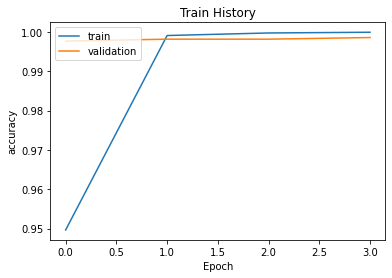

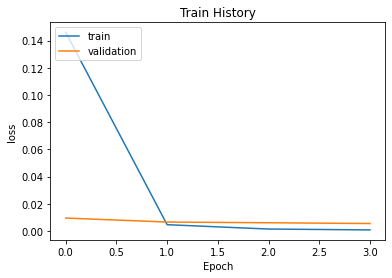

In [ ]:
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [ ]:
y_pred1 = model1.predict(x_test)
y_pred1




array([[1.8700387e-04],
       [4.1282980e-04],
       [9.9749362e-01],
       ...,
       [2.0030566e-04],
       [9.9874651e-01],
       [9.9941945e-01]], dtype=float32)

In [ ]:
y_test

40603    0
34872    0
36067    1
26280    1
8191     1
        ..
15332    0
17095    0
15369    0
3188     1
23697    1
Name: label, Length: 8980, dtype: int64

In [ ]:
prediction = []
for i in range(len(y_pred1)):
  if (y_pred1[i].item() > 0.5):
    prediction.append(1)
  else:
    prediction.append(0)


In [ ]:
prediction

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model accuracy is : ", accuracy)

Model accuracy is :  0.9985523385300669


In [ ]:
cm=confusion_matrix(y_test, prediction)


In [ ]:
cm

array([[4723,    8],
       [   5, 4244]])

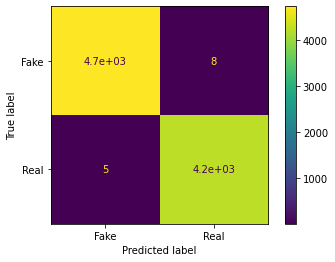

In [ ]:
metrics.ConfusionMatrixDisplay(cm,display_labels=['Fake','Real']).plot()

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4731
           1       1.00      1.00      1.00      4249

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



#testing on kaggle datset


In [ ]:
trainkagg=pd.read_csv('/content/drive/My Drive/fake news/train.csv')
trainkagg

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
trainkagg.isnull().sum()


id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
trainkagg=trainkagg.drop(trainkagg[trainkagg['text'].isnull()==True].index)
trainkagg.isnull().sum()

id           0
title      558
author    1918
text         0
label        0
dtype: int64

In [ ]:
trainkagg=trainkagg.fillna('')
trainkagg.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
trainkagg.shape

(20761, 5)

In [ ]:
trainkagg['preproc']=trainkagg['text'].apply(preprocess)

In [ ]:
trainkagg['text']=trainkagg['preproc'].apply(lambda x: " ".join(x))

In [ ]:
trainkagg.head(10)

,id,title,author,text,label,preproc
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide comey letter jason chaffetz twe...,1,"[house, dem, aide, comey, letter, jason, chaff..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,feeling life circles roundabout heads straight...,0,"[feeling, life, circles, roundabout, heads, st..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,truth fired october tension intelligence analy...,1,"[truth, fired, october, tension, intelligence,..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos civilians killed single airstrike ident...,1,"[videos, civilians, killed, single, airstrike,..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print iranian woman sentenced years prison ira...,1,"[print, iranian, woman, sentenced, years, pris..."
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,trying times jackie mason voice reason week ex...,0,"[trying, times, jackie, mason, voice, reason, ..."
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,wonder britain iconic pop pianist gets long fl...,1,"[wonder, britain, iconic, pop, pianist, gets, ..."
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,paris france chose idealistic traditional cand...,0,"[paris, france, chose, idealistic, traditional..."
8,8,Excerpts From a Draft Script for Donald Trump’...,,donald trump scheduled highly anticipated visi...,0,"[donald, trump, scheduled, highly, anticipated..."
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,week michael flynn resigned national security ...,0,"[week, michael, flynn, resigned, national, sec..."


In [ ]:
trainkagg['lematized'] = trainkagg['preproc'].apply(lambda x: word_lemmatizer(x))
trainkagg

,id,title,author,text,label,preproc,lematized
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide comey letter jason chaffetz twe...,1,"[house, dem, aide, comey, letter, jason, chaff...","[house, dem, aide, comey, letter, jason, chaff..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,feeling life circles roundabout heads straight...,0,"[feeling, life, circles, roundabout, heads, st...","[feeling, life, circle, roundabout, head, stra..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,truth fired october tension intelligence analy...,1,"[truth, fired, october, tension, intelligence,...","[truth, fired, october, tension, intelligence,..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos civilians killed single airstrike ident...,1,"[videos, civilians, killed, single, airstrike,...","[video, civilian, killed, single, airstrike, i..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print iranian woman sentenced years prison ira...,1,"[print, iranian, woman, sentenced, years, pris...","[print, iranian, woman, sentenced, year, priso..."
...,...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,rapper unloaded black celebrities met donald t...,0,"[rapper, unloaded, black, celebrities, met, do...","[rapper, unloaded, black, celebrity, met, dona..."
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,green bay packers lost washington redskins wee...,0,"[green, bay, packers, lost, washington, redski...","[green, bay, packer, lost, washington, redskin..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,macy today grew union great names american ret...,0,"[macy, today, grew, union, great, names, ameri...","[macy, today, grew, union, great, name, americ..."
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,nato russia hold parallel exercises balkans pr...,1,"[nato, russia, hold, parallel, exercises, balk...","[nato, russia, hold, parallel, exercise, balka..."


In [ ]:
trainkagg['text'] = trainkagg['lematized'].apply(lambda x: " ".join(x))

In [ ]:
trainkagg['label']=trainkagg['label'].apply(lambda x: 1 if x==0 else 0)

In [ ]:
x_trainkagg=trainkagg['text']
y_trainkagg=trainkagg['label']

In [ ]:
x_trainkagg

0        house dem aide comey letter jason chaffetz twe...
1        feeling life circle roundabout head straight l...
2        truth fired october tension intelligence analy...
3        video civilian killed single airstrike identif...
4        print iranian woman sentenced year prison iran...
                               ...                        
20795    rapper unloaded black celebrity met donald tru...
20796    green bay packer lost washington redskin week ...
20797    macy today grew union great name american reta...
20798    nato russia hold parallel exercise balkan pres...
20799    david swanson author activist journalist radio...
Name: text, Length: 20761, dtype: object

In [ ]:
y_trainkagg

0        0
1        1
2        0
3        0
4        0
        ..
20795    1
20796    1
20797    1
20798    0
20799    0
Name: label, Length: 20761, dtype: int64

In [ ]:
y_trainkagg=np.asarray(y_trainkagg)

In [ ]:
x_trainkagg = tokenizer.texts_to_sequences(x_trainkagg)


In [ ]:
vocab_size2=[]
for seq in x_trainkagg:
  vocab_size2.extend(seq)
len(set(vocab_size2))

53021

In [ ]:
len(x_trainkagg[0])

388

In [ ]:
len(x_trainkagg[1])

321

In [ ]:
maxlength2=-1
for i in range(len(x_trainkagg)):
  if maxlength2<len(x_trainkagg[i]):
    maxlength2=len(x_trainkagg[i])
    maxidx2=i

print(maxlength2,maxidx2)

10007 13503


In [ ]:
x_trainkagg=pad_sequences(x_trainkagg,maxlen=inp_len,padding='post',truncating='post')

In [ ]:
print(x_trainkagg.shape)

(20761, 4594)


In [ ]:
y_pred2 = model1.predict(x_trainkagg)
y_pred2

array([[0.00055043],
       [0.00045214],
       [0.0015454 ],
       ...,
       [0.00139592],
       [0.06553651],
       [0.00287649]], dtype=float32)

In [ ]:
prediction1 = []
for i in range(len(y_pred2)):
  if (y_pred2[i].item() > 0.5):
    prediction1.append(1)
  else:
    prediction1.append(0)


In [ ]:
accuracy = accuracy_score(list(y_trainkagg), prediction1)

print("Model accuracy is : ", accuracy)

Model accuracy is :  0.5258898896970281
